In [51]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.linear_model import LinearRegression


In [52]:
def linear_search(arr,item):
    for x in range(len(arr)):
        if(arr[x]==item):
            return

def bs(arr,target)->None:
    low = 0
    high = len(arr) - 1

    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1

    return None

In [53]:
input_sizes = np.arange(5000000, 10000001, 100000)
time_ls=[]
time_bs=[]


In [54]:
#NOT WORKING AS Y COEFF COMING NEGATIVE

def estimate_coef(x, y):
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()

In [55]:
for x in input_sizes:
    arr=range(1,x+1)
    strt=time.time()
    linear_search(arr,x)
    end=time.time()
    time_ls.append(end-strt)
    strt=time.time()
    bs(arr,x)
    end=time.time()
    time_bs.append(end-strt)




In [56]:
import pandas as pd
time_ls=np.array(time_ls)
info={
    'x':input_sizes,
    'y':time_ls
}
info2={
    'x':input_sizes,
    'y':time_bs
}
data=pd.DataFrame(info)
data2=pd.DataFrame(info2)



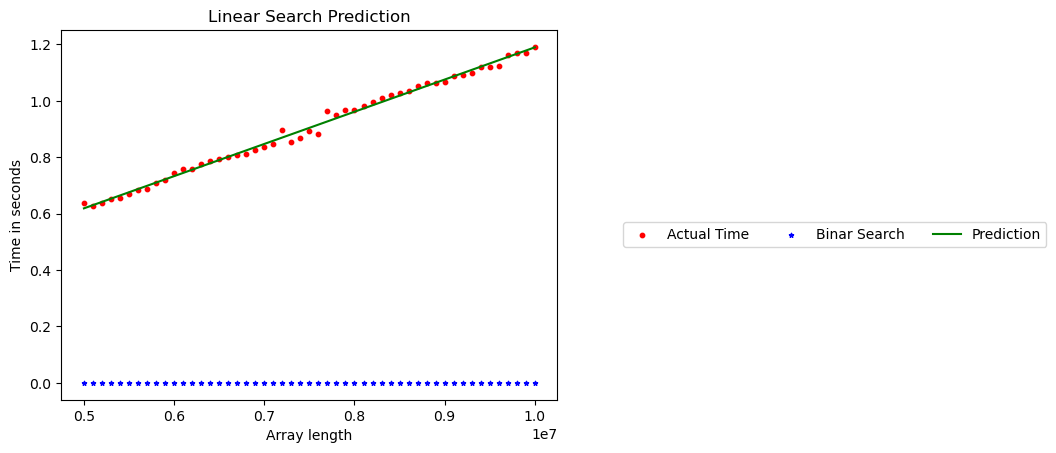

In [69]:
reg = LinearRegression().fit(input_sizes.reshape(-1,1), data['y'])
reg.score(input_sizes.reshape(-1,1), data['y'])
plt.scatter(data['x'],data['y'],color='r',s=10,label='Actual Time')
plt.scatter(data2['x'],data2['y'],color='b',s=10,marker='*',label='Binar Search')
plt.plot(input_sizes,reg.predict(input_sizes.reshape(-1,1)),color='g',label='Prediction')
plt.xlabel('Array length')
plt.ylabel('Time in seconds')
plt.title('Linear Search Prediction')
plt.legend(bbox_to_anchor =(2, 0.5), ncol = 3)
plt.show()